### Аналитика в авиакомпании.

Произведем импортирование необходимых для работы библиотек.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Затем прочитаем данные, которые мы делали в предыдущих заданиях.

В первой таблице содержится информация о:
model — модели самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [2]:
flights_model = pd.read_csv('/datasets/query_1.csv')
flights_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Во второой таблице содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

In [3]:
flights_city = pd.read_csv('/datasets/query_3.csv')
flights_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Для этих двух наборов данных нужно:
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [4]:
flights_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
flights_model.isna().sum()

model             0
flights_amount    0
dtype: int64

In [6]:
flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
flights_city.isna().sum()

city               0
average_flights    0
dtype: int64

0

Мы видим, что обе таблицы содержать небольшое количество информации. Также не содержат пропущенных значений. Типы данных соответсвуют самим значениям, значит и менять их не нужно. Данные уже готовы для дальнейшей работы с ними.

### 1. Выбрать топ-10 городов по количеству рейсов;

Отсортируем дф по столбцу среднего количества рейсов за день по убыванию и заменим индексы на от 1 до 10, чтобы получился Топ-10.

In [9]:
flights_city_top10 = flights_city.sort_values('average_flights', ascending=False).head(10)
flights_city_top10.index=['1','2','3','4','5','6','7','8','9','10']
flights_city_top10

,city,average_flights
1,Москва,129.774194
2,Санкт-Петербург,31.161290
3,Новосибирск,17.322581
4,Красноярск,11.580645
5,Екатеринбург,11.322581
6,Ростов-на-Дону,10.193548
7,Пермь,10.129032
8,Брянск,10.000000
9,Сочи,9.612903
10,Ульяновск,9.580645


Мы видим, что лидером данного топа является Москва. В Москве во много раз больше рейсов, чем в следующем в топе городе Санкт-Петербурге. Это связано и с количеством аэропортов в городе и с тем, что максимальное количество международных рейсов в Москве имеет больший охват направлений, чем в любом другом городе.

### 2. Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

#### 2.1. График моделей самолетов и количества рейсов.

Для данных нам таблиц, удобнее всего для визуализации будет использовать график типа 'bar'. Столбчатые диаграммы, которые будут показывать определенное значение для определенного параметра.

Text(0.5, 1.0, 'Количество рейсов распределённое по моделям самолетов')

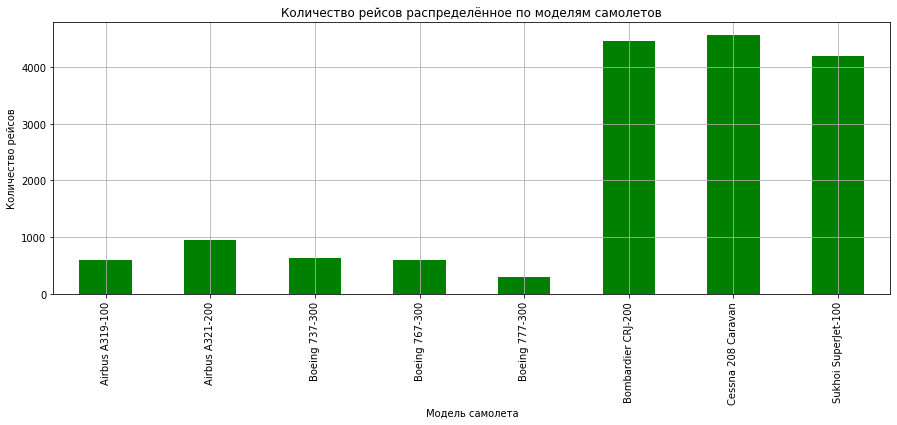

In [10]:
flights_model.plot(x='model', y='flights_amount', kind='bar', grid=True, figsize=(15,5), linewidth=5, color='g', legend=False)
plt.ylabel('Количество рейсов')
plt.xlabel('Модель самолета')
plt.title('Количество рейсов распределённое по моделям самолетов')

По графику мы видим, что на последних трех позициях располагаются самолеты, количество рейсов которых, превышает остальные многократно. Среди нет ни Боинга ни Аэробуса. 
- Sukhoi SuperJet-100 пользуется такой популярность, потому, что это самолет российского производства. Соответственно авиакомпаниям он обходится значительно дешевле, чем американские Боинги или европейские Airbus.
- Cessna 208 caravan лёгкий одномоторный турбовинтовой самолёт. Он вмещает до 9 пассажиров. По  сравнению с остальными самолетами он маленький, а значит не летает на дальние расстояния и может подниматься в воздух в несколько раз чаще, чем большие самолеты.
- Bombardier crj-200 популярен для частных перевозок, например, как бизнес-джет или чартер. Относительно маленький и не летает на дальние расстояния, что позволяет подниматься в воздух очень частно, за счет этого и такое количество рейсов.

Боинги и аэробусы при этом намного дороже в эксплуатации, нуждаются в долгой подготовке к рейсу. Поэтому их количество рейсов сильно меньше, чем тот же сухой суперджет.

#### 2.2. График городов и количества рейсов.

Text(0.5, 1.0, 'Среднее количество рейсов распределённое по городам')

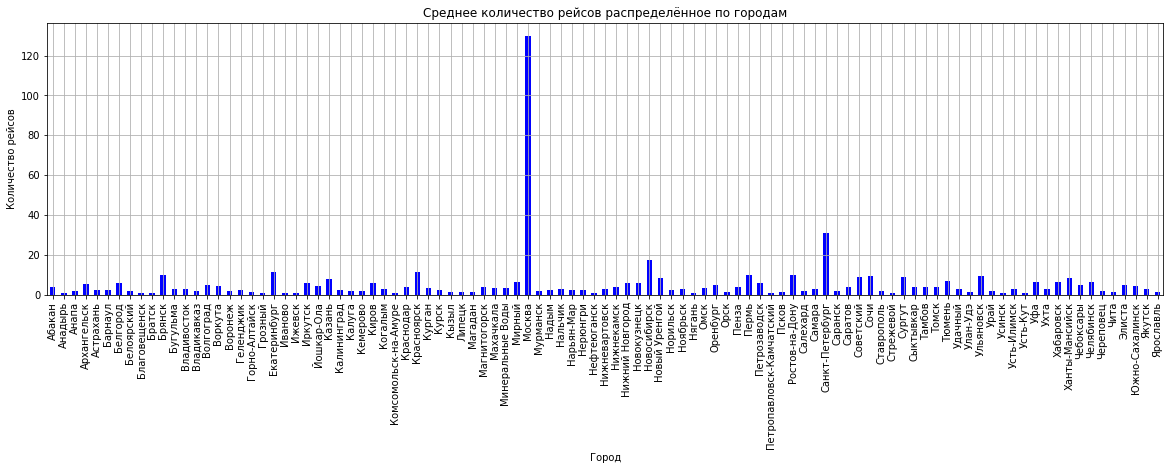

In [11]:
flights_city.plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(20,5), linewidth=5, color='b', legend=False)
plt.ylabel('Количество рейсов')
plt.xlabel('Город')
plt.title('Среднее количество рейсов распределённое по городам')

Мы видим, что есть пики значений, которые явно выделяются, они и будут, скорее всего, в топ-10 городов. Больше всего рейсов, конечно, у Москвы, ведь она связывает все города страны.

#### 2.3. График "Топ-10" городов и количества рейсов.

Text(0.5, 1.0, 'Среднее количество рейсов распределённое по "Топ-10" городов')

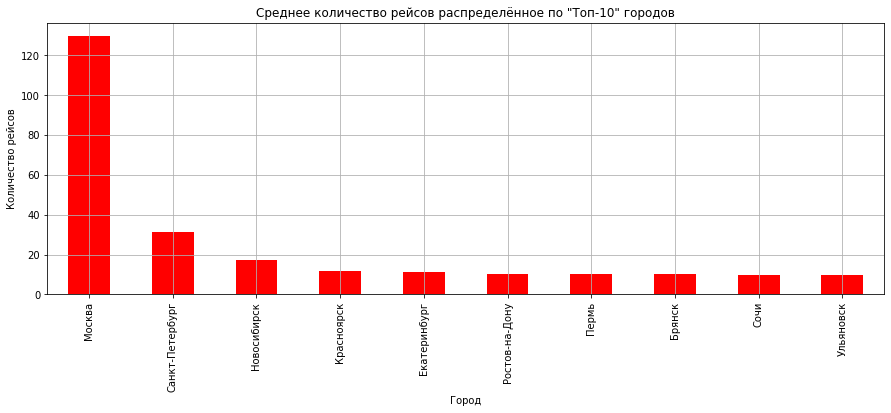

In [12]:
flights_city_top10.plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(15,5), linewidth=5, color='r', legend=False)
plt.ylabel('Количество рейсов')
plt.xlabel('Город')
plt.title('Среднее количество рейсов распределённое по "Топ-10" городов')

- Большое количество рейсов в Москве объяснимо, ведь там действует целых 5 международных аэропортов;
- В Санкт- Петербурге, при этом, действует всего один аэропорт, но этот город популярен для туризма, а значит в него приезжают люди чаще;
- Во всех остальных городах один аэропорт, кроме Красноярска, там два. Но этот город не сильно пользуется туристической популярностью, поэтому и рейсов туда не очень много.

### Общий вывод по аналитике.

Мы видим, что лидером данного топа является Москва. В Москве во много раз больше рейсов, чем в следующем в топе городе Санкт-Петербурге. Это связано и с количеством аэропортов в городе и с тем, что максимальное количество международных рейсов в Москве имеет больший охват направлений, чем в любом другом городе.

Города в топ-10 большие, в плане численности населения, поэтому и рейсов туда много.

По графику мы видим, что на последних трех позициях располагаются самолеты, количество рейсов которых, превышает остальные многократно. Среди нет ни Боинга ни Аэробуса. 
- Sukhoi SuperJet-100 пользуется такой популярность, потому, что это самолет российского производства. Соответственно авиакомпаниям он обходится значительно дешевле, чем американские Боинги или европейские Airbus.
- Cessna 208 caravan лёгкий одномоторный турбовинтовой самолёт. Он вмещает до 9 пассажиров. По  сравнению с остальными самолетами он маленький, а значит не летает на дальние расстояния и может подниматься в воздух в несколько раз чаще, чем большие самолеты.
- Bombardier crj-200 популярен для частных перевозок, например, как бизнес-джет или чартер. Относительно маленький и не летает на дальние расстояния, что позволяет подниматься в воздух очень частно, за счет этого и такое количество рейсов.

Боинги и аэробусы при этом намного дороже в эксплуатации, нуждаются в долгой подготовке к рейсу. Поэтому их количество рейсов сильно меньше, чем тот же сухой суперджет.

- Большое количество рейсов в Москве объяснимо, ведь там действует целых 5 международных аэропортов;
- В Санкт- Петербурге, при этом, действует всего один аэропорт, но этот город популярен для туризма, а значит в него приезжают люди чаще;
- Во всех остальных городах один аэропорт, кроме Красноярска, там два. Но этот город не сильно пользуется туристической популярностью, поэтому и рейсов туда не очень много.